In [1]:
#import plaidml.keras
#plaidml.keras.install_backend()

ImportError: No module named 'plaidml'

In [2]:
import keras 
import datetime 
from keras import optimizers
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten, BatchNormalization
from keras.optimizers import SGD
from sklearn.preprocessing import OneHotEncoder

from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

%config IPCompleter.greedy=True

Using TensorFlow backend.


In [18]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Pre-processing

In [9]:
#from keras import backend as k

#k.tensorflow_backend._get_available_gpus()

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# number of classes in the dataset
num_classes= 10

#class_names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(x_train.shape)

(50000, 32, 32, 3)


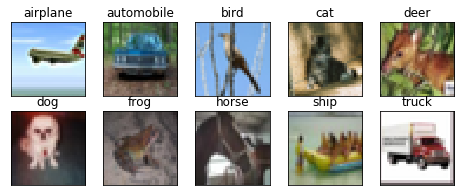

In [5]:
# print figure with 10 random images from each class
fig= plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax=fig.add_subplot(2,5,1+i,xticks=[],yticks=[])
    idx=np.where(y_train[:]==i)[0]
    features_idx=x_train[idx,::]
    img_num=np.random.randint(features_idx.shape[0])
    im=features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [6]:
datagen = ImageDataGenerator (rotation_range=90,
                             width_shift_range=0.1, height_shift_range=0.1,
                              horizontal_flip=True)

datagen.fit(x_train)

In [7]:
new_x_train= x_train/255
new_x_test= x_test/255

x_trainvec= np.reshape(new_x_train,(50000,3072))
x_testvec= np.reshape(new_x_test,(10000,3072))

In [8]:

y_train_ohe=np.eye(num_classes)[y_train]
y_test_ohe=np.eye(num_classes)[y_test]

new_y_train_ohe = np.squeeze(y_train_ohe, axis=1)
new_y_test_ohe = np.squeeze(y_test_ohe, axis=1)
new_y_train_ohe.shape


(50000, 10)

In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3881351758908443492
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4388320901333013217
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3924205211657219249
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 582156288
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 17999685854728804572
physical_device_desc: "device: 0, name: GeForce GTX TITAN X, pci bus id: 0000:01:00.0, compute capability: 5.2"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 11814492570
locality {
  bus_id: 1
  links {
    link {
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 498316286120891328
physical_

# Feed-forward Neural Networks (FFNNs)

In [10]:
def plot_model_metrics(model_history):
    #plot loss
    fig1= plt.figure(1)
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('categorical cross-entropy loss')
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper right')
    
    #plot accuracy
    fig2= plt.figure(2)
    plt.plot(model_history.history['acc'])
    plt.plot(model_history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper right')
    
    plt.show()

In [28]:
sgd2=optimizers.SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 

BEST FFNN!

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 186us/step - loss: 2.1098 - acc: 0.2004 - val_loss: 1.9364 - val_acc: 0.2569
Epoch 2/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.9177 - acc: 0.2860 - val_loss: 1.8105 - val_acc: 0.3426
Epoch 3/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.8483 - acc: 0.3213 - val_loss: 1.7858 - val_acc: 0.3600
Epoch 4/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.8017 - acc: 0.3446 - val_loss: 1.7145 - val_acc: 0.3800
Epoch 5/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.7623 - acc: 0.3583 - val_loss: 1.6724 - val_acc: 0.3947
Epoch 6/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.7268 - acc: 0.3735 - val_loss: 1.7431 - val_acc: 0.3716
Epoch 7/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.7004 - acc: 0.3841 - val_loss: 1.

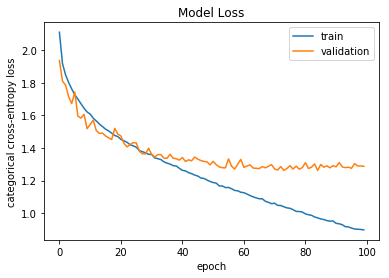

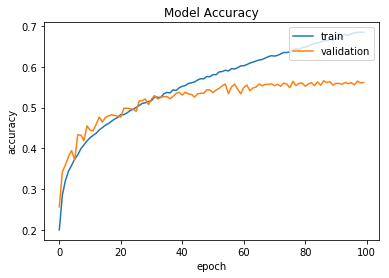

In [32]:
model14= Sequential()

model14= Sequential()
model14.add(Dense(3072, activation='relu',input_dim=3072,kernel_initializer='he_normal'))
model14.add(Dropout(0.3))
model14.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model14.add(Dropout(0.3))
model14.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model14.add(Dropout(0.3))
model14.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model14.add(Dropout(0.3))
model14.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model14.add(Dense(10,activation='softmax',kernel_initializer='he_normal'))

initial_time14= datetime.datetime.now()

model14.compile(loss='categorical_crossentropy',optimizer=sgd2,metrics=['accuracy'])

history14=model14.fit(x_trainvec,new_y_train_ohe, epochs=100,batch_size=64, validation_data=(x_testvec,new_y_test_ohe))

score14=model14.evaluate(x_testvec,new_y_test_ohe,batch_size=64)

finishing_time14= datetime.datetime.now()

training_time14= finishing_time14-initial_time14

print('Training:',training_time14)
print('Score:', score14)

plot_model_metrics(history14)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 20s 394us/step - loss: 2.3185 - acc: 0.1040 - val_loss: 2.2884 - val_acc: 0.1342
Epoch 2/500
50000/50000 [==============================] - 18s 370us/step - loss: 2.1572 - acc: 0.1693 - val_loss: 2.0717 - val_acc: 0.1816
Epoch 3/500
50000/50000 [==============================] - 19s 370us/step - loss: 2.0703 - acc: 0.1831 - val_loss: 2.0642 - val_acc: 0.1797
Epoch 4/500
50000/50000 [==============================] - 18s 369us/step - loss: 2.0322 - acc: 0.1901 - val_loss: 2.0732 - val_acc: 0.1857
Epoch 5/500
50000/50000 [==============================] - 18s 369us/step - loss: 2.0081 - acc: 0.1954 - val_loss: 2.0436 - val_acc: 0.1798
Epoch 6/500
50000/50000 [==============================] - 19s 370us/step - loss: 1.9875 - acc: 0.2011 - val_loss: 1.9880 - val_acc: 0.2056
Epoch 7/500
50000/50000 [==============================] - 19s 370us/step - loss: 1.9740 - acc: 0.2063 - val_l

Epoch 59/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.3346 - acc: 0.5263 - val_loss: 1.3519 - val_acc: 0.5239
Epoch 60/500
50000/50000 [==============================] - 19s 371us/step - loss: 1.3316 - acc: 0.5256 - val_loss: 1.3446 - val_acc: 0.5243
Epoch 61/500
50000/50000 [==============================] - 19s 371us/step - loss: 1.3291 - acc: 0.5286 - val_loss: 1.3706 - val_acc: 0.5206
Epoch 62/500
50000/50000 [==============================] - 19s 371us/step - loss: 1.3232 - acc: 0.5307 - val_loss: 1.3541 - val_acc: 0.5230
Epoch 63/500
50000/50000 [==============================] - 18s 369us/step - loss: 1.3105 - acc: 0.5332 - val_loss: 1.3586 - val_acc: 0.5249
Epoch 64/500
50000/50000 [==============================] - 18s 367us/step - loss: 1.3083 - acc: 0.5355 - val_loss: 1.3467 - val_acc: 0.5340
Epoch 65/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.3009 - acc: 0.5366 - val_loss: 1.3473 - val_acc: 0.5354
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.0553 - acc: 0.6287 - val_loss: 1.3181 - val_acc: 0.5460
Epoch 118/500
50000/50000 [==============================] - 18s 370us/step - loss: 1.0588 - acc: 0.6267 - val_loss: 1.2759 - val_acc: 0.5554
Epoch 119/500
50000/50000 [==============================] - 18s 368us/step - loss: 1.0479 - acc: 0.6311 - val_loss: 1.3136 - val_acc: 0.5456
Epoch 120/500
50000/50000 [==============================] - 18s 369us/step - loss: 1.0399 - acc: 0.6373 - val_loss: 1.2922 - val_acc: 0.5579
Epoch 121/500
50000/50000 [==============================] - 18s 370us/step - loss: 1.0386 - acc: 0.6353 - val_loss: 1.3167 - val_acc: 0.5537
Epoch 122/500
50000/50000 [==============================] - 19s 370us/step - loss: 1.0448 - acc: 0.6329 - val_loss: 1.3115 - val_acc: 0.5500
Epoch 123/500
50000/50000 [==============================] - 18s 370us/step - loss: 1.0359 - acc: 0.6366 - val_loss: 1.2991 - val_acc: 0.5591
Epoch 

Epoch 175/500
50000/50000 [==============================] - 19s 372us/step - loss: 0.8384 - acc: 0.7080 - val_loss: 1.2975 - val_acc: 0.5727
Epoch 176/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.8336 - acc: 0.7085 - val_loss: 1.3020 - val_acc: 0.5721
Epoch 177/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.8325 - acc: 0.7089 - val_loss: 1.2970 - val_acc: 0.5688
Epoch 178/500
50000/50000 [==============================] - 19s 370us/step - loss: 0.8251 - acc: 0.7112 - val_loss: 1.3585 - val_acc: 0.5592
Epoch 179/500
50000/50000 [==============================] - 19s 371us/step - loss: 0.8287 - acc: 0.7111 - val_loss: 1.3294 - val_acc: 0.5677
Epoch 180/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.8250 - acc: 0.7136 - val_loss: 1.3404 - val_acc: 0.5632
Epoch 181/500
50000/50000 [==============================] - 18s 368us/step - loss: 0.8219 - acc: 0.7147 - val_loss: 1.3016 - val_acc: 0.5717
Epoch 

Epoch 233/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.6512 - acc: 0.7741 - val_loss: 1.3835 - val_acc: 0.5774
Epoch 234/500
50000/50000 [==============================] - 19s 370us/step - loss: 0.6531 - acc: 0.7741 - val_loss: 1.3616 - val_acc: 0.5752
Epoch 235/500
50000/50000 [==============================] - 19s 373us/step - loss: 0.6527 - acc: 0.7743 - val_loss: 1.3977 - val_acc: 0.5685
Epoch 236/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.6530 - acc: 0.7755 - val_loss: 1.3776 - val_acc: 0.5798
Epoch 237/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.6470 - acc: 0.7776 - val_loss: 1.3612 - val_acc: 0.5787
Epoch 238/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.6485 - acc: 0.7762 - val_loss: 1.3822 - val_acc: 0.5719
Epoch 239/500
50000/50000 [==============================] - 18s 368us/step - loss: 0.6433 - acc: 0.7775 - val_loss: 1.3860 - val_acc: 0.5725
Epoch 

Epoch 291/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.5223 - acc: 0.8218 - val_loss: 1.4552 - val_acc: 0.5874
Epoch 292/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.5228 - acc: 0.8209 - val_loss: 1.4819 - val_acc: 0.5778
Epoch 293/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.5165 - acc: 0.8245 - val_loss: 1.4769 - val_acc: 0.5728
Epoch 294/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.5172 - acc: 0.8237 - val_loss: 1.4231 - val_acc: 0.5803
Epoch 295/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.5125 - acc: 0.8246 - val_loss: 1.4821 - val_acc: 0.5800
Epoch 296/500
50000/50000 [==============================] - 19s 371us/step - loss: 0.5221 - acc: 0.8227 - val_loss: 1.4256 - val_acc: 0.5819
Epoch 297/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.5024 - acc: 0.8279 - val_loss: 1.4556 - val_acc: 0.5802
Epoch 

Epoch 349/500
50000/50000 [==============================] - 18s 368us/step - loss: 0.4208 - acc: 0.8589 - val_loss: 1.5073 - val_acc: 0.5795
Epoch 350/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.4246 - acc: 0.8545 - val_loss: 1.5391 - val_acc: 0.5827
Epoch 351/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.4173 - acc: 0.8590 - val_loss: 1.4953 - val_acc: 0.5872
Epoch 352/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.4123 - acc: 0.8612 - val_loss: 1.4883 - val_acc: 0.5884
Epoch 353/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.4175 - acc: 0.8584 - val_loss: 1.5230 - val_acc: 0.5866
Epoch 354/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.4158 - acc: 0.8588 - val_loss: 1.5524 - val_acc: 0.5853
Epoch 355/500
50000/50000 [==============================] - 19s 371us/step - loss: 0.4089 - acc: 0.8618 - val_loss: 1.5597 - val_acc: 0.5865
Epoch 

Epoch 407/500
50000/50000 [==============================] - 18s 368us/step - loss: 0.3475 - acc: 0.8830 - val_loss: 1.6108 - val_acc: 0.5852
Epoch 408/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.3482 - acc: 0.8801 - val_loss: 1.6122 - val_acc: 0.5842
Epoch 409/500
50000/50000 [==============================] - 19s 372us/step - loss: 0.3481 - acc: 0.8827 - val_loss: 1.5982 - val_acc: 0.5834
Epoch 410/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.3434 - acc: 0.8846 - val_loss: 1.5564 - val_acc: 0.5904
Epoch 411/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.3424 - acc: 0.8848 - val_loss: 1.5745 - val_acc: 0.5866
Epoch 412/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.3344 - acc: 0.8865 - val_loss: 1.6105 - val_acc: 0.5843
Epoch 413/500
50000/50000 [==============================] - 19s 370us/step - loss: 0.3441 - acc: 0.8838 - val_loss: 1.5997 - val_acc: 0.5878
Epoch 

Epoch 465/500
50000/50000 [==============================] - 19s 371us/step - loss: 0.2918 - acc: 0.9046 - val_loss: 1.6351 - val_acc: 0.5890
Epoch 466/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.2888 - acc: 0.9046 - val_loss: 1.6152 - val_acc: 0.5923
Epoch 467/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.2843 - acc: 0.9045 - val_loss: 1.6798 - val_acc: 0.5882
Epoch 468/500
50000/50000 [==============================] - 18s 370us/step - loss: 0.2830 - acc: 0.9045 - val_loss: 1.6425 - val_acc: 0.5914
Epoch 469/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.2842 - acc: 0.9055 - val_loss: 1.6103 - val_acc: 0.5929
Epoch 470/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.2856 - acc: 0.9026 - val_loss: 1.6910 - val_acc: 0.5870
Epoch 471/500
50000/50000 [==============================] - 18s 369us/step - loss: 0.2884 - acc: 0.9038 - val_loss: 1.6340 - val_acc: 0.5955
Epoch 

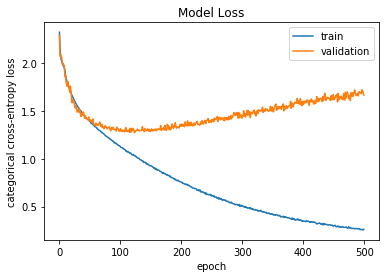

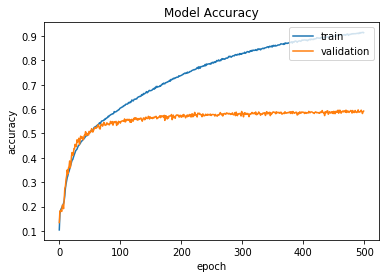

In [39]:
model17= Sequential()

model17= Sequential()
model17.add(Dense(3072, activation='relu',input_dim=3072,kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.4))
model17.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.3))
model17.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.3))
model17.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.3))
model17.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.3))
model17.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.3))
model17.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.3))
model17.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model17.add(Dense(10,activation='softmax',kernel_initializer='he_normal'))

initial_time17= datetime.datetime.now()

model17.compile(loss='categorical_crossentropy',optimizer=sgd2,metrics=['accuracy'])

history17=model17.fit(x_trainvec,new_y_train_ohe, epochs=500,batch_size=32, validation_data=(x_testvec,new_y_test_ohe))

score17=model17.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time17= datetime.datetime.now()

training_time17= finishing_time17-initial_time17

print('Training:',training_time17)
print('Score:', score17)

plot_model_metrics(history17)

## Convolutional Neural Networks

In [12]:
batch_size = 64

weight_decay = 1e-4
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()

opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, new_y_train_ohe, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=128,\
                    verbose=1,validation_data=(x_test,new_y_test_ohe))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
__________

781/781 [==============================] - 22s 28ms/step - loss: 0.8814 - acc: 0.7450 - val_loss: 0.9399 - val_acc: 0.7450
Epoch 94/128
781/781 [==============================] - 22s 28ms/step - loss: 0.8787 - acc: 0.7494 - val_loss: 0.9476 - val_acc: 0.7400
Epoch 95/128
781/781 [==============================] - 22s 28ms/step - loss: 0.8825 - acc: 0.7478 - val_loss: 0.9905 - val_acc: 0.7309
Epoch 96/128
781/781 [==============================] - 22s 28ms/step - loss: 0.8770 - acc: 0.7496 - val_loss: 0.8673 - val_acc: 0.7647
Epoch 97/128
781/781 [==============================] - 22s 28ms/step - loss: 0.8828 - acc: 0.7455 - val_loss: 0.9159 - val_acc: 0.7525
Epoch 98/128
781/781 [==============================] - 22s 28ms/step - loss: 0.8731 - acc: 0.7516 - val_loss: 0.8435 - val_acc: 0.7675
Epoch 99/128
781/781 [==============================] - 22s 28ms/step - loss: 0.8756 - acc: 0.7497 - val_loss: 1.0275 - val_acc: 0.7160
Epoch 100/128
781/781 [==============================] - 22s 